KeyError:  -> label ist not a valid state! skipping transition..


/home/max/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


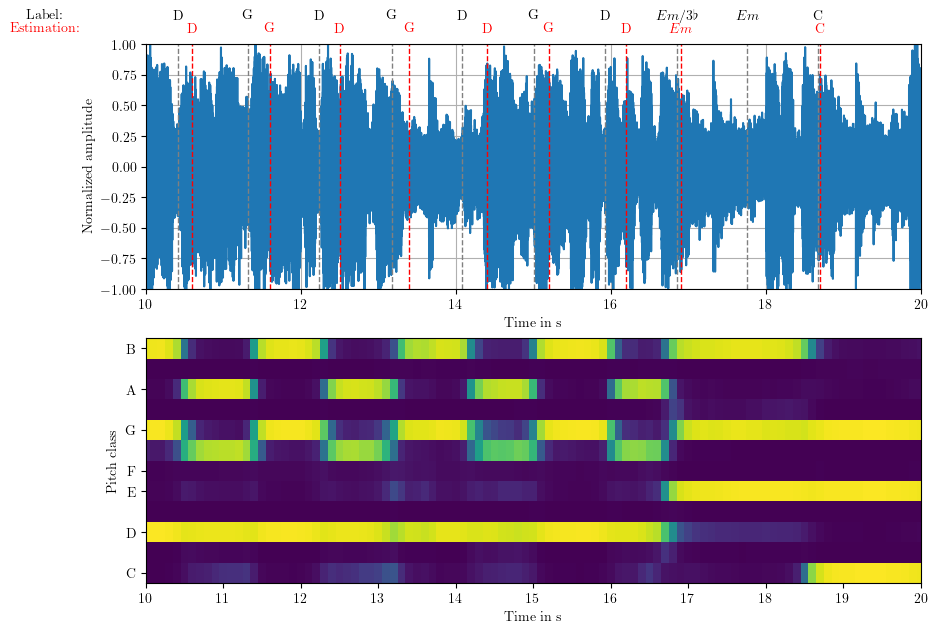

In [5]:
import HMM
import pandas as pd
import dataloader
import matplotlib.pyplot as plt
import chromagram
import utils

# load model 
chroma_df = pd.read_pickle("/home/max/ET-TI/Masterarbeit/prototyping/data/beatles/beatles_chroma_majmin.pkl")  
# TODO rename label '' to 'N'
labels = chroma_df['label'].unique()
labels.sort()
hmm = HMM.HiddenMarkovModel(chroma_df,labels)

dataset = dataloader.BeatlesDataset()
song_id = 105 # Two of Us starts with a series of No Chords! There are some issues with this!
song_id = 150
chroma,annotations = dataset[song_id]
t,features = chroma
t_start,t_stop,chords = hmm.predict(t,features)

# Visualization of Results
audiopath,annotationpath = dataset.getFilepaths(song_id)
interval = (10,20)
fig,ax = plt.subplots(2,1,figsize=(10,7))
utils.plotAudioWaveform(ax[0],audiopath,interval)
utils.plotAnnotations(ax[0],annotationpath,interval)
utils.plotPredictionResult(ax[0],t_start,chords,interval)
chromagram.plotChroma(ax[1],features,interval)

In [12]:
import mir_eval
root,quality,scaledegrees,bass= mir_eval.chord.split('G#:hdim7')
mir_eval.chord.join(root,quality,scaledegrees,bass)

'Gb:hdim7'

In [13]:
import mir_eval
import dataloader



dataset = dataloader.BeatlesDataset()
title,chroma,annotations = dataset[25]
print(f"{title}")
for i in range(16):
    print(f"Chord: {annotations[0][i,0]} - {annotations[0][i,1]}  {annotations[1][i]}")
# scores = mir_eval.chord.evaluate(ref_intervals, ref_labels,
#                                     est_intervals, est_labels)

beatles_10_CD2_The_Beatles_03_Mother_Natures_Son
Chord: 0.0 - 0.363805  N
Chord: 0.363805 - 2.16368  B:min
Chord: 2.16368 - 4.001851  D/5
Chord: 4.001851 - 5.935759  G#:hdim7
Chord: 5.935759 - 8.424949  E:9
Chord: 8.424949 - 9.828412  D
Chord: 9.828412 - 11.279659  D:sus4
Chord: 11.279659 - 12.707687  D:maj(9)
Chord: 12.707687 - 19.708503  D
Chord: 19.708503 - 21.15975  D
Chord: 21.15975 - 24.062244  G/5
Chord: 24.062244 - 25.501882  D
Chord: 25.501882 - 26.895079  B:min
Chord: 26.895079 - 28.381156  D/5
Chord: 28.381156 - 29.785963  G#:hdim7
Chord: 29.785963 - 31.23721  E:9


180


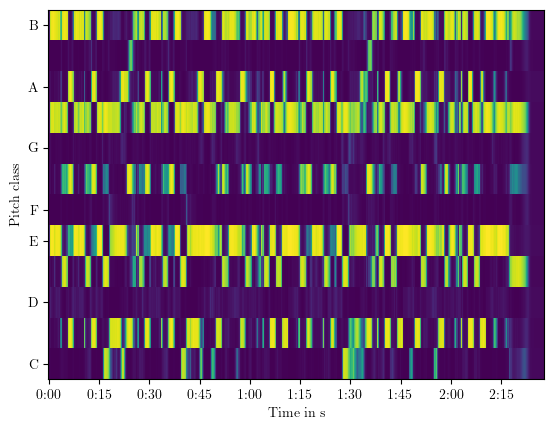

In [3]:
import utils
import dataloader
import chromagram
import matplotlib.pyplot as plt
basepath = "/home/max/ET-TI/Masterarbeit/prototyping/data/chord_sequences/"
x = dataloader.getChordSequencesPaths(basepath)
basepath = "/home/max/ET-TI/Masterarbeit/prototyping/data/beatles/"
dataset = dataloader.BeatlesDataset(basepath,chroma_type='madmom')
chroma,target_df = dataset[0]
fig,ax = plt.subplots()
chromagram.plotChroma(ax,chroma[1])

In [ ]:
fig,ax = plt.subplots()
chromagram.plotChroma(ax,chroma)

---Testing---

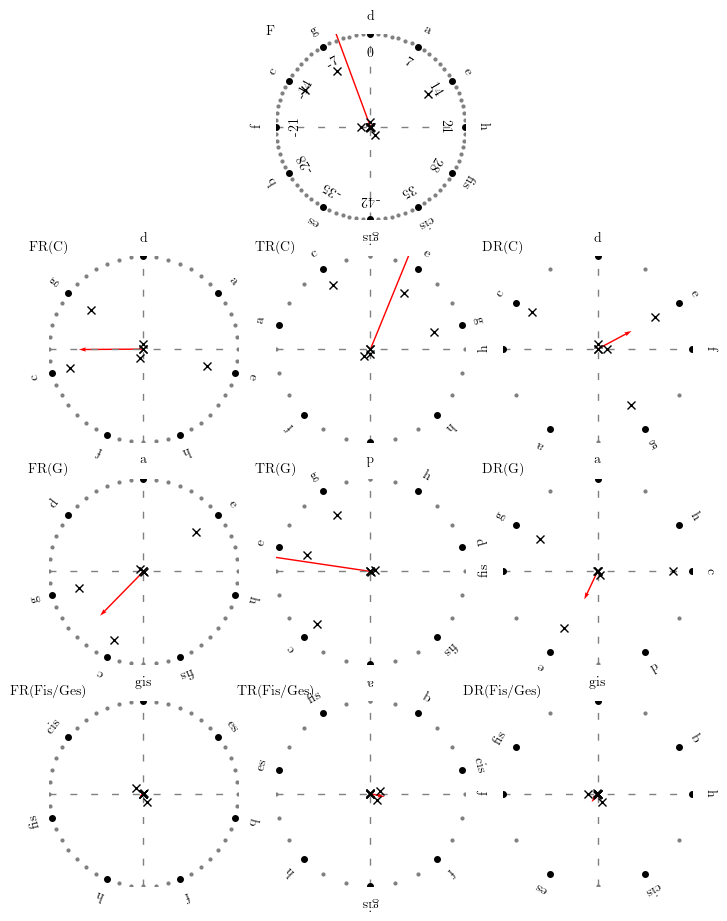

In [ ]:

import circularPitchSpace as cps
chroma = np.array([[0.8,0.1,0.05,0.01,.7,.1,0.01,.7,0,0,0,0],[1,0,0,0,1,0,0,0,0,1,0,0]])
rho_F,rho_FR,rho_TR,rho_DR = cps.transformChroma(chroma)

# C,G,Fis
keys = [0,1,6]

fig,ax = plt.subplots(len(keys)+1,3,figsize=(8.3,8.3*(len(keys)+1)/3))
ax[0,0].axis('off')
cps.plotCircleOfFifths(ax[0,1],chroma=chroma[0,:])
ax[0,2].axis('off')
for i,n_k in enumerate(keys):
    cps.plotKeyRelatedRealPitches(ax[i+1,0],n_k=n_k,chroma=chroma[0,:],circle='FR')
    cps.plotKeyRelatedRealPitches(ax[i+1,1],n_k=n_k,chroma=chroma[0,:],circle='TR')
    cps.plotKeyRelatedRealPitches(ax[i+1,2],n_k=n_k,chroma=chroma[0,:],circle='DR')
# store alls 37 cps features in dataframe